In [1]:

#importing required libraries for EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\UJJWAL TOMAR\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Loading dataset and treat 'NA' strings as missing values
data = pd.read_csv("project-data.csv", delimiter=';', skipinitialspace=True, na_values=['NA'])

##### DATA CLEANING

In [3]:
# Remove whitespace in columns and string values
data.columns = data.columns.str.strip()

for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()

In [4]:
#To view first 5 rows in the dataset
data.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
#To view last 5 rows in the dataset
data.tail()   

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71
614,cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68


In [6]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     615 non-null    object 
dtypes: float64(9), int64(1), object(3)


In [7]:
#after performing data.info()- we found that there are some missing values in the dataset.
#albumin, alkaline_phosphatase, alanine_aminotransferase,cholesterol have missing values.
#protein column is in object datatype and we need to change the datatypet to float.

In [8]:
# Convert 'protein' column to numeric, coercing errors to NaN
data['protein'] = pd.to_numeric(data['protein'], errors='coerce')

In [9]:
# Statistical summary
data.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [10]:
# Display Total no of rows & columns
data.shape

(615, 13)

In [11]:
# Display column names
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [12]:
#Check for missing values
data.isnull().sum()  

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64

In [13]:
# check for duplicates
data.duplicated().sum()

0

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
#Handling missing values

data['albumin'].fillna(data['albumin'].median(), inplace=True)
data['alkaline_phosphatase'].fillna(data['alkaline_phosphatase'].median(), inplace=True)
data['protein'].fillna(data['protein'].median(), inplace=True)

In [16]:
# Display datatypes of each column
data.dtypes

category                       object
age                             int64
sex                            object
albumin                       float64
alkaline_phosphatase          float64
alanine_aminotransferase      float64
aspartate_aminotransferase    float64
bilirubin                     float64
cholinesterase                float64
cholesterol                   float64
creatinina                    float64
gamma_glutamyl_transferase    float64
protein                       float64
dtype: object

##### Outliers Detection and Treatment

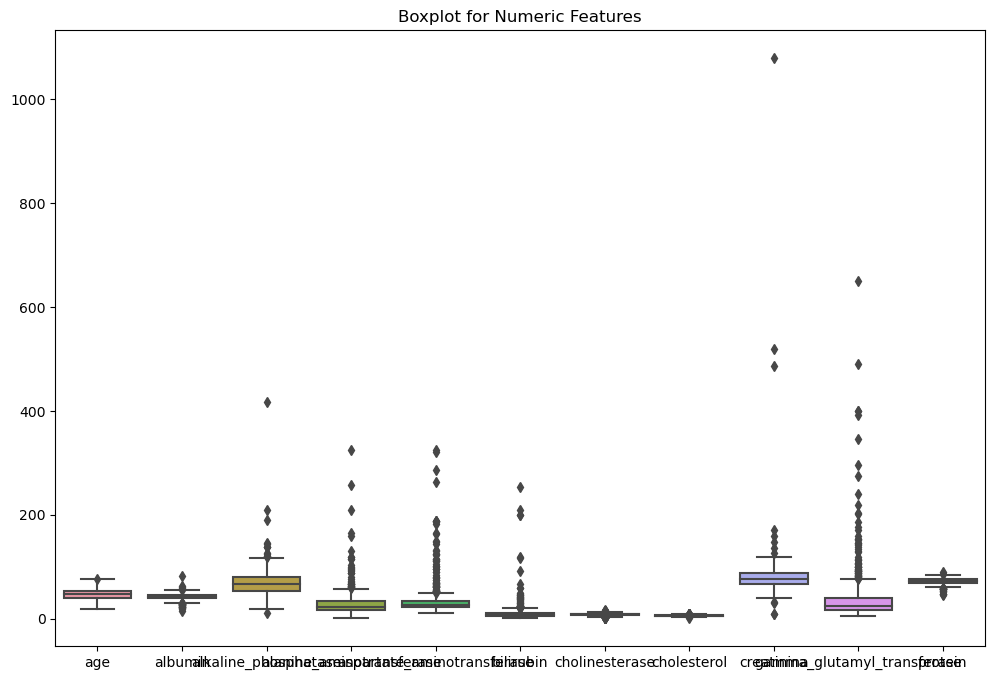

In [17]:
# Boxplot to detect outliers for numeric features
plt.figure(figsize=(12,8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numeric Features')
plt.show()

In [18]:
# Outlier treatment using IQR capping
def cap_outliers_iqr(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

df_capped = cap_outliers_iqr(data)

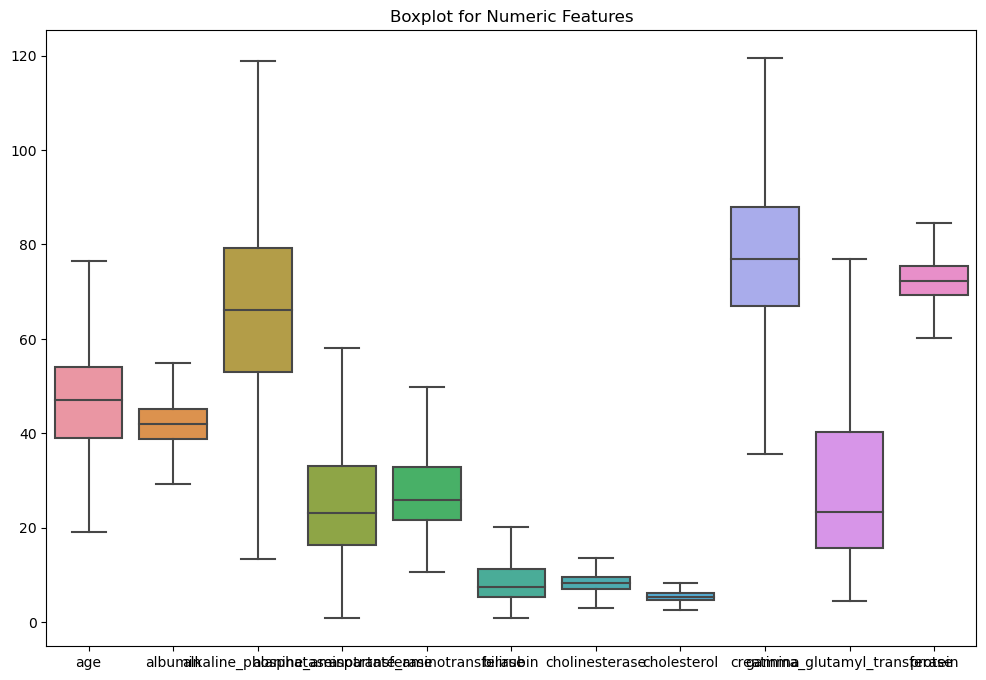

In [19]:
# Boxplot after treating outliers using IQR method for numeric features
plt.figure(figsize=(12,8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numeric Features')
plt.show()

In [20]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

DATA VISUALIZATION

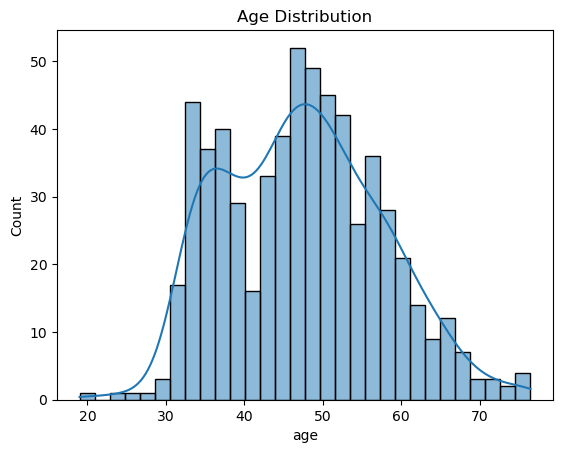

In [21]:
#Univariate analysis 
# Histograms for single column 'age'
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

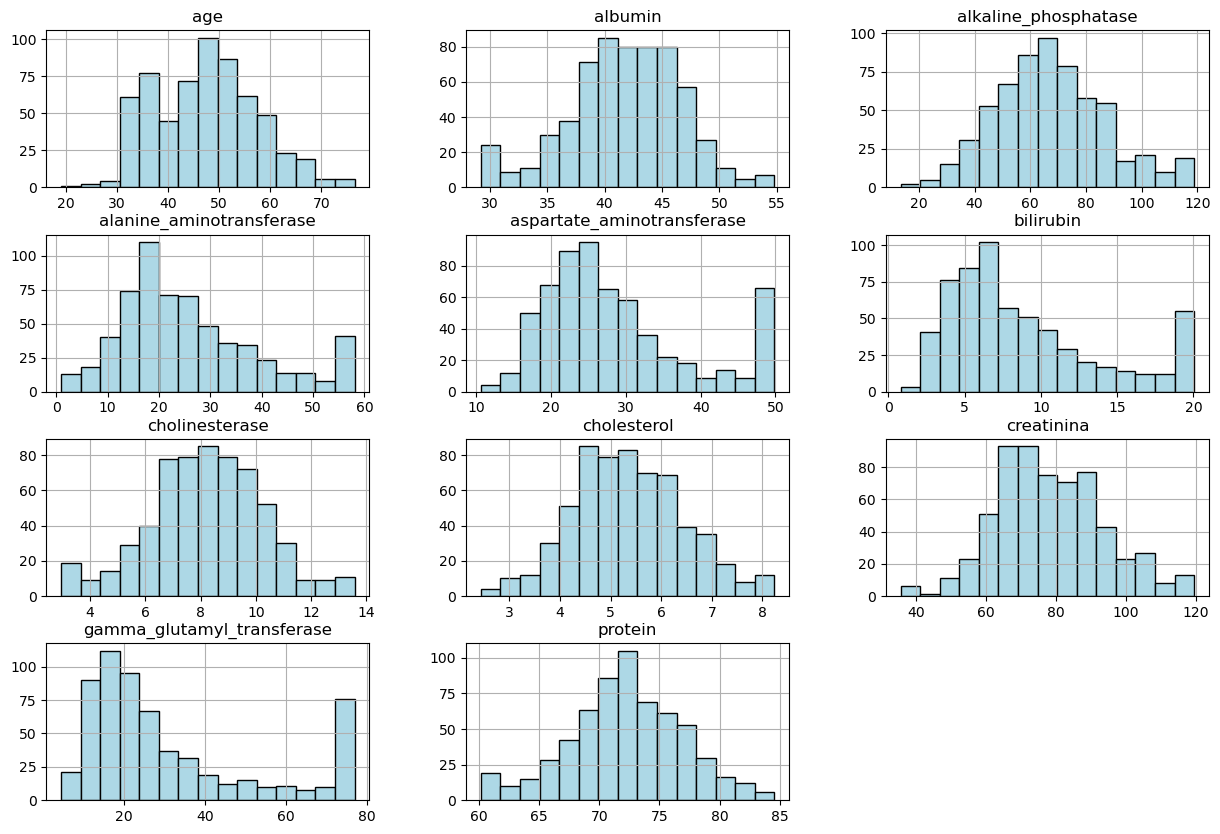

In [22]:
#HISTOGRAM
# Histograms for all numeric columns
data[numeric_cols].hist(figsize= (15,10), bins=15, facecolor="lightblue", edgecolor="black")
plt.title("Histogram of numerical columns")
plt.show()

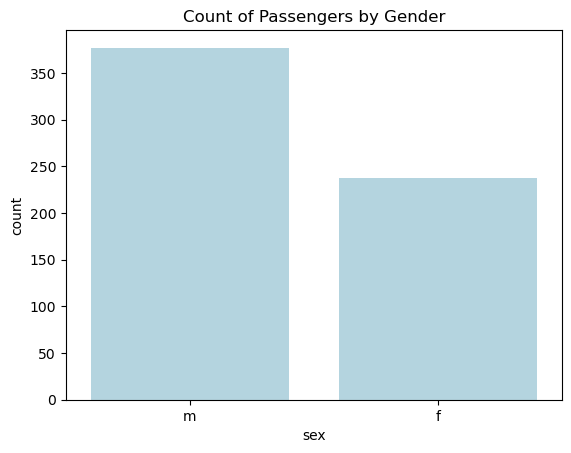

In [23]:
#univariate analysis for categorical column
sns.countplot(x='sex', data=data, color='lightblue')
plt.title('Count of Passengers by Gender')
plt.show()

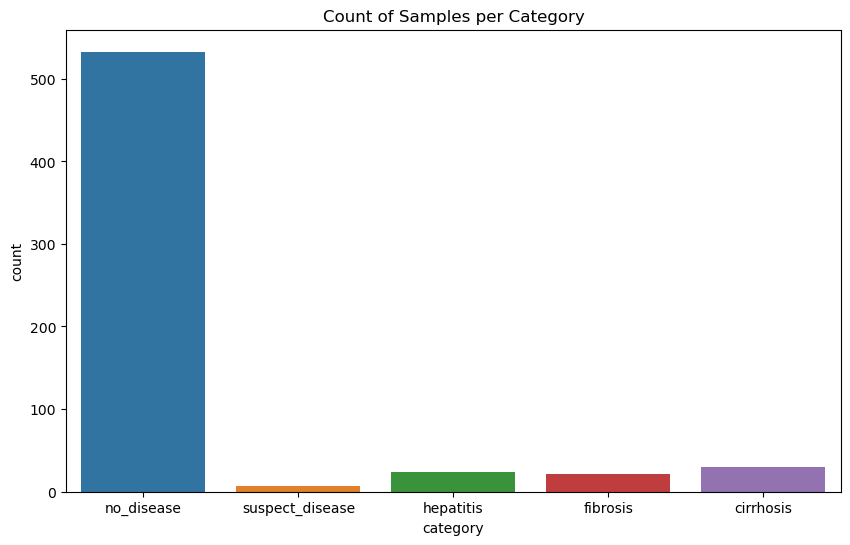

In [24]:
# Plot countplot for categorical features - bivariate
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='category')
plt.title('Count of Samples per Category')
plt.show()

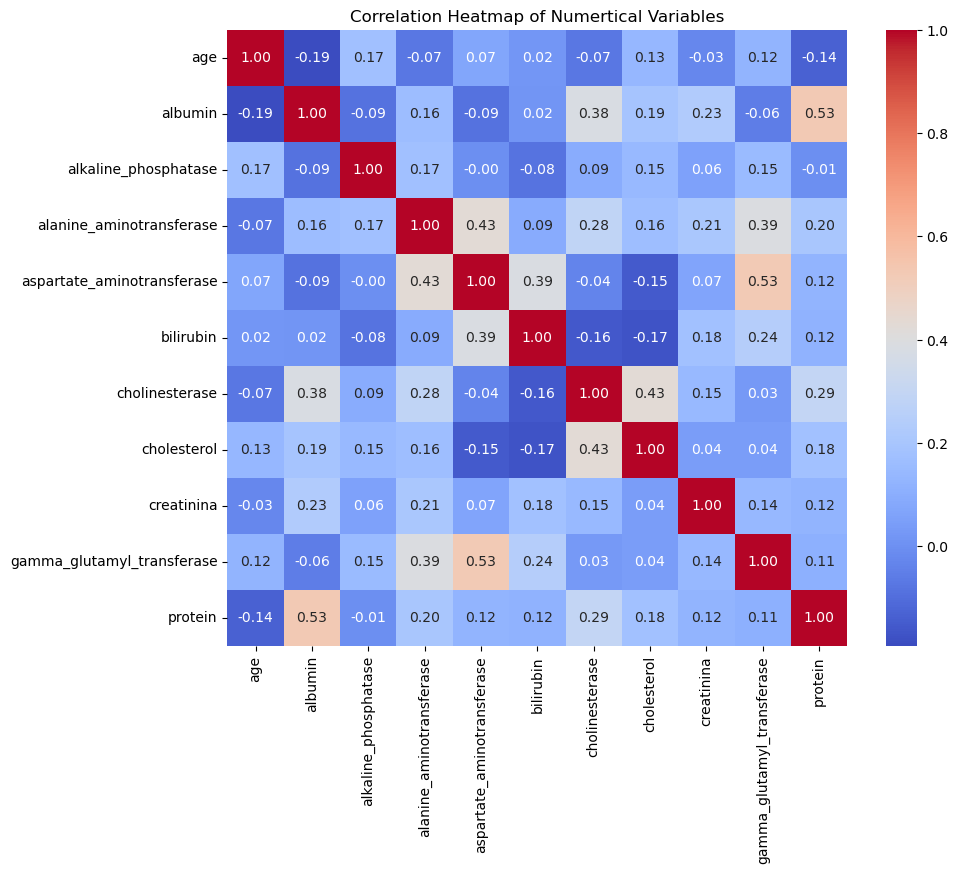

In [25]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
corr=data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numertical Variables")
plt.show()

##### FEATURE ENGINEERING

##### Encoding Techniques

In [26]:
from sklearn.preprocessing import LabelEncoder

# Convert text categories into numeric labels
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['category'] = le.fit_transform(data['category'])

In [27]:
# Save label encoder for deployment, we can inverse_transform predictions later
# pickle.dump(le, open('label_encoder.pkl', 'wb'))

##### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

#Split into features(X) and Target(y)
#category is our target column

X =data.drop("category", axis=1)
y = data["category"]

In [29]:
# Split into train-test sets using 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(492, 12) (123, 12) (492,) (123,)


In [31]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)    # fit on train only
X_test = scaler.transform(X_test)          # apply same transform to test

In [32]:
import numpy as np

print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())


9
2


In [33]:
# For training data

columns = ['age', 'sex', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase', 
                'aspartate_aminotransferase', 'bilirubin', 'cholinesterase', 'cholesterol', 
                'creatinina', 'gamma_glutamyl_transferase', 'protein']

# Convert NumPy X_train and X_test back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=columns)
X_test_df = pd.DataFrame(X_test, columns=columns)

# missing value handling:
for col in X_train_df.columns:
    if X_train_df[col].isnull().sum() > 0:
        median_val = X_train_df[col].median()
        X_train_df[col].fillna(median_val, inplace=True)

for col in X_test_df.columns:
    if X_test_df[col].isnull().sum() > 0:
        # Use training median to avoid data leakage
        median_val = X_train_df[col].median()
        X_test_df[col].fillna(median_val, inplace=True)


In [34]:
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

0
0


#### MODEL BUILDING 

##### LOGISTIC REGRESSION - MODEL 1

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
#fitting the model
lr=LogisticRegression(max_iter=200, random_state=42)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [37]:
lr_ypred_test = lr.predict(X_test)
lr_yproba_test = lr.predict_proba(X_test)[:,1]

lr_ypred_train = lr.predict(X_train)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

##### Evaluation:

In [39]:
print('Classification Report of Training Data')
print(f'{classification_report(y_train, lr_ypred_train)}')
print("Accuracy: ", accuracy_score(y_train, lr_ypred_train))
print("precision: ", precision_score(y_train, lr_ypred_train, average='weighted'))
print("Recall: ", recall_score(y_train, lr_ypred_train, average='weighted'))
print("F1-Score: ", f1_score(y_train, lr_ypred_train, average='weighted'))

print('\nClassification Report of Test Data')
print(f'{classification_report(y_test, lr_ypred_test)}')
print("Accuracy: ", accuracy_score(y_test, lr_ypred_test))
print("precision: ", precision_score(y_test, lr_ypred_test, average='weighted'))
print("Recall: ", recall_score(y_test, lr_ypred_test, average='weighted'))
print("F1-Score: ", f1_score(y_test, lr_ypred_test, average='weighted'))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.81      0.87      0.84        15
           2       0.88      0.47      0.61        15
           3       0.98      1.00      0.99       437
           4       0.75      0.75      0.75         4

    accuracy                           0.97       492
   macro avg       0.87      0.78      0.81       492
weighted avg       0.97      0.97      0.96       492

Accuracy:  0.967479674796748
precision:  0.9661537135270456
Recall:  0.967479674796748
F1-Score:  0.9645829901254848

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.44      0.67      0.53         6
           2       1.00      0.44      0.62         9
           3       0.95      1.00      0.97        96
           4       1.00      0.33      0.50     

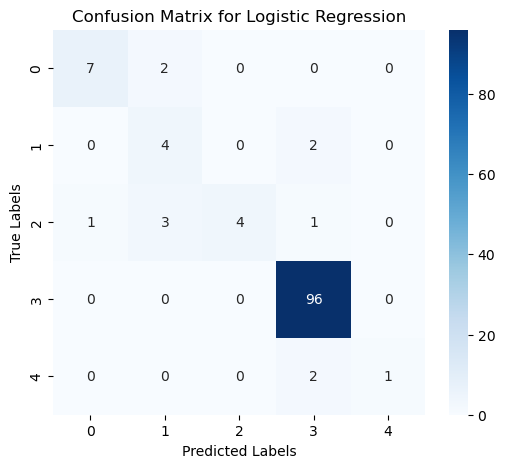

In [40]:
cm = confusion_matrix(y_test, lr_ypred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [41]:
# binary encoding
y_test_binary = (y_test == y_test.unique()[1]).astype(int)

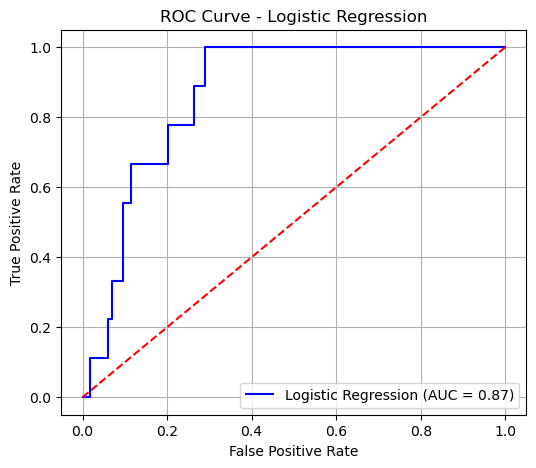

In [42]:
# ROC 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_binary, lr_yproba_test)
auc_score = roc_auc_score(y_test_binary, lr_yproba_test)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### DESCISION TREE - MODEL 2

In [43]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [44]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

In [45]:
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [46]:
print("Decision Tree Best Params:", grid_search_dt.best_params_)
print("Decision Tree Best Score:", grid_search_dt.best_score_)

Decision Tree Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Best Score: 0.9309214594928882


In [47]:
best_dt = grid_search_dt.best_estimator_

In [48]:
dt_ypred_test = best_dt.predict(X_test)

dt_ypred_train = best_dt.predict(X_train)

In [49]:
print('Classification Report of Training Data')
print(f'{classification_report(y_train, dt_ypred_train)}')
print("Accuracy: ", accuracy_score(y_train, dt_ypred_train))
print("precision: ", precision_score(y_train, dt_ypred_train, average='weighted'))
print("Recall: ", recall_score(y_train, dt_ypred_train, average='weighted'))
print("F1-Score: ", f1_score(y_train, dt_ypred_train, average='weighted'))

print('\nClassification Report of Test Data')
print(f'{classification_report(y_test, dt_ypred_test)}')
print("Accuracy: ", accuracy_score(y_test, dt_ypred_test))
print("precision: ", precision_score(y_test, dt_ypred_test, average='weighted'))
print("Recall: ", recall_score(y_test, dt_ypred_test, average='weighted'))
print("F1-Score: ", f1_score(y_test, dt_ypred_test, average='weighted'))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.75      0.80      0.77        15
           2       0.78      0.47      0.58        15
           3       0.99      0.99      0.99       437
           4       1.00      0.50      0.67         4

    accuracy                           0.96       492
   macro avg       0.85      0.74      0.77       492
weighted avg       0.97      0.96      0.96       492

Accuracy:  0.9634146341463414
precision:  0.9652777777777778
Recall:  0.9634146341463414
F1-Score:  0.9617325752750615

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.33      0.33      0.33         6
           2       0.40      0.22      0.29         9
           3       0.90      0.97      0.93        96
           4       0.00      0.00      0.00   

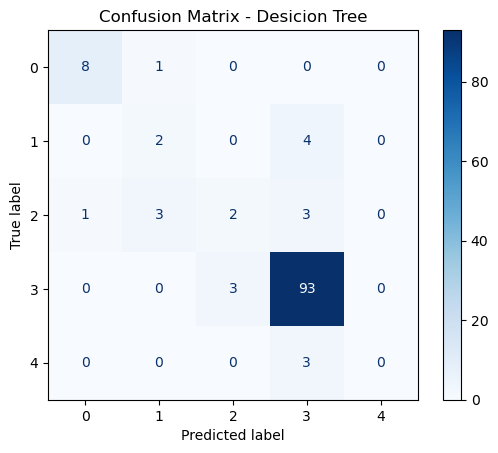

In [50]:
# Compute the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, dt_ypred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Desicion Tree')
plt.show()

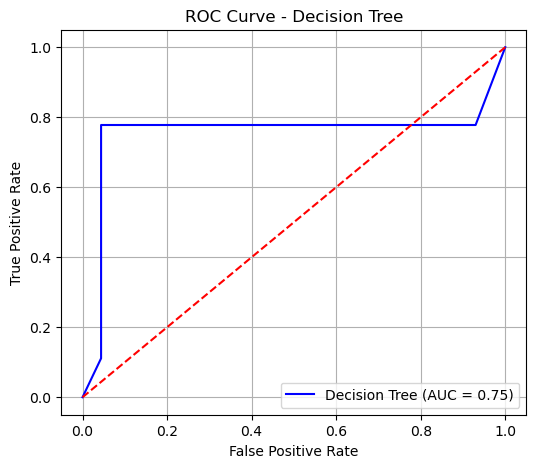

In [51]:
dt_yproba_test = best_dt.predict_proba(X_test)[:, 1]

#ROC Curve and auc

fpr, tpr, thresholds = roc_curve(y_test_binary, dt_yproba_test)
auc_score = roc_auc_score(y_test_binary, dt_yproba_test)

# Plot ROC Curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### RANDOM FOREST - MODEL 3

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
rf_ypred_train = rf.predict(X_train)
rf_ypred_test = rf.predict(X_test)

In [54]:
print('🔹 Random Forest Classification Report - Training Data')
print(classification_report(y_train, rf_ypred_train))
print("Accuracy: ", accuracy_score(y_train, rf_ypred_train))
print("Precision: ", precision_score(y_train, rf_ypred_train, average='weighted'))
print("Recall: ", recall_score(y_train, rf_ypred_train, average='weighted'))
print("F1-Score: ", f1_score(y_train, rf_ypred_train, average='weighted'))

🔹 Random Forest Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.80      0.86        15
           2       1.00      0.33      0.50        15
           3       0.96      1.00      0.98       437
           4       0.00      0.00      0.00         4

    accuracy                           0.96       492
   macro avg       0.77      0.60      0.65       492
weighted avg       0.95      0.96      0.95       492

Accuracy:  0.959349593495935
Precision:  0.9521402004072095
Recall:  0.959349593495935
F1-Score:  0.9500787748108104


In [55]:
# Evaluation - Test Data
print('\n🔹 Random Forest Classification Report - Test Data')
print(classification_report(y_test, rf_ypred_test))
print("Accuracy: ", accuracy_score(y_test, rf_ypred_test))
print("Precision: ", precision_score(y_test, rf_ypred_test, average='weighted'))
print("Recall: ", recall_score(y_test, rf_ypred_test, average='weighted'))
print("F1-Score: ", f1_score(y_test, rf_ypred_test, average='weighted'))


🔹 Random Forest Classification Report - Test Data
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.20      0.17      0.18         6
           2       0.00      0.00      0.00         9
           3       0.86      1.00      0.92        96
           4       0.00      0.00      0.00         3

    accuracy                           0.83       123
   macro avg       0.41      0.34      0.36       123
weighted avg       0.75      0.83      0.78       123

Accuracy:  0.8292682926829268
Precision:  0.7519163763066201
Recall:  0.8292682926829268
F1-Score:  0.7815842693891475


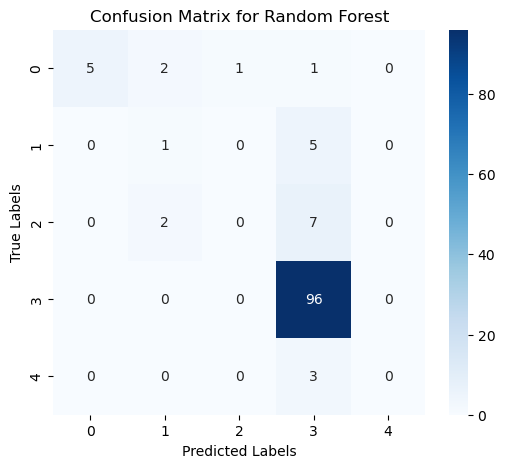

In [56]:
cm = confusion_matrix(y_test, rf_ypred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

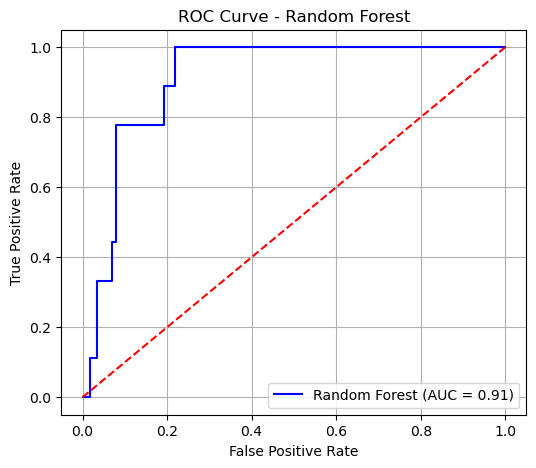

In [57]:
rf_yproba_test = rf.predict_proba(X_test)[:, 1]

#ROC Curve and auc

fpr, tpr, thresholds = roc_curve(y_test_binary, rf_yproba_test)
auc_score = roc_auc_score(y_test_binary, rf_yproba_test)

# Plot ROC Curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### GRADIENT BOOSTING - MODEL 4

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

In [60]:
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gbc.fit(X_train, y_train)

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], 'subsample': [0.8, 1.0]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [61]:
best_gb = grid_search_gbc.best_estimator_
print("Gradient Boosting Best Params:", grid_search_gbc.best_params_)
print("Gradient Boosting Best Score:", grid_search_gbc.best_score_)

Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boosting Best Score: 0.9390434961863534


In [62]:
gb_ypred_train = best_gb.predict(X_train)
gb_ypred_test = best_gb.predict(X_test)

In [63]:
print('Classification Report of Training Data')
print(f'{classification_report(y_train, gb_ypred_train)}')
print("Accuracy: ", accuracy_score(y_train, gb_ypred_train))
print("precision: ", precision_score(y_train, gb_ypred_train, average='weighted'))
print("Recall: ", recall_score(y_train, gb_ypred_train, average='weighted'))
print("F1-Score: ", f1_score(y_train, gb_ypred_train, average='weighted'))

print('\nClassification Report of Test Data')
print(f'{classification_report(y_test, gb_ypred_test)}')
print("Accuracy: ", accuracy_score(y_test, gb_ypred_test))
print("precision: ", precision_score(y_test, gb_ypred_test, average='weighted'))
print("Recall: ", recall_score(y_test, gb_ypred_test, average='weighted'))
print("F1-Score: ", f1_score(y_test, gb_ypred_test, average='weighted'))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00       437
           4       1.00      1.00      1.00         4

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492

Accuracy:  1.0
precision:  1.0
Recall:  1.0
F1-Score:  1.0

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.40      0.33      0.36         6
           2       0.75      0.33      0.46         9
           3       0.89      0.99      0.94        96
           4       0.00      0.00      0.00         3

    accuracy                           0.86       1

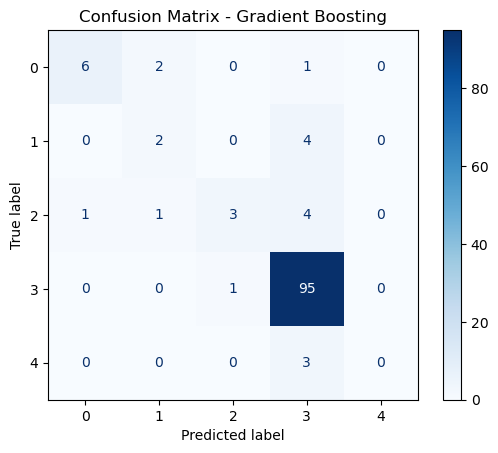

In [64]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, gb_ypred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

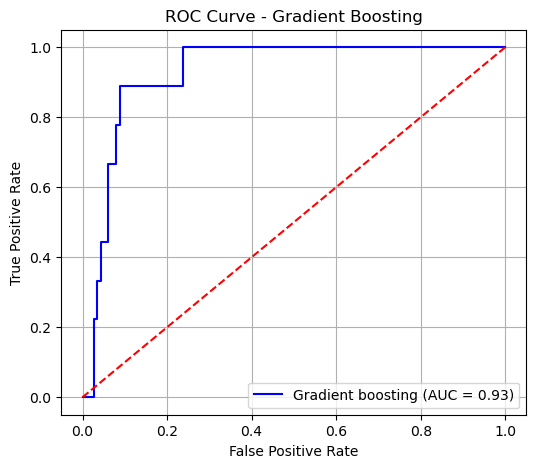

In [65]:
gb_yproba_test = best_gb.predict_proba(X_test)[:, 1]

#ROC Curve and auc

fpr, tpr, thresholds = roc_curve(y_test_binary, gb_yproba_test)
auc_score = roc_auc_score(y_test_binary, gb_yproba_test)

# Plot ROC Curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Gradient boosting (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### SUPPORT VECTOR MACHINE (SVM) - MODEL 5

In [66]:
from sklearn.svm import SVC

In [67]:
svc = SVC(probability = True, random_state=42)
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [68]:
gridsearch_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
gridsearch_svc.fit(X_train, y_train)

,estimator,SVC(probabili...ndom_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [69]:
best_svc = gridsearch_svc.best_estimator_

print("SVC Best Params:", gridsearch_svc.best_params_)
print("SVC Best Score:", gridsearch_svc.best_score_)

SVC Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVC Best Score: 0.9431251288394146


In [70]:
svc_ypred_train = best_svc.predict(X_train)
svc_ypred_test = best_svc.predict(X_test)

In [71]:
print('Classification Report of Training Data')
print(f'{classification_report(y_train, svc_ypred_train)}')
print("Accuracy: ", accuracy_score(y_train, svc_ypred_train))
print("precision: ", precision_score(y_train, svc_ypred_train, average='weighted'))
print("Recall: ", recall_score(y_train, svc_ypred_train, average='weighted'))
print("F1-Score: ", f1_score(y_train, svc_ypred_train, average='weighted'))

print('\nClassification Report of Test Data')
print(f'{classification_report(y_test, svc_ypred_test)}')
print("Accuracy: ", accuracy_score(y_test, svc_ypred_test))
print("precision: ", precision_score(y_test, svc_ypred_test, average='weighted'))
print("Recall: ", recall_score(y_test, svc_ypred_test, average='weighted'))
print("F1-Score: ", f1_score(y_test, svc_ypred_test, average='weighted'))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.88      0.93      0.90        15
           2       1.00      0.47      0.64        15
           3       0.98      1.00      0.99       437
           4       1.00      1.00      1.00         4

    accuracy                           0.98       492
   macro avg       0.96      0.87      0.90       492
weighted avg       0.98      0.98      0.98       492

Accuracy:  0.9796747967479674
precision:  0.9801531714641472
Recall:  0.9796747967479674
F1-Score:  0.9768732742882801

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.44      0.67      0.53         6
           2       0.50      0.22      0.31         9
           3       0.96      0.98      0.97        96
           4       1.00      0.33      0.50   

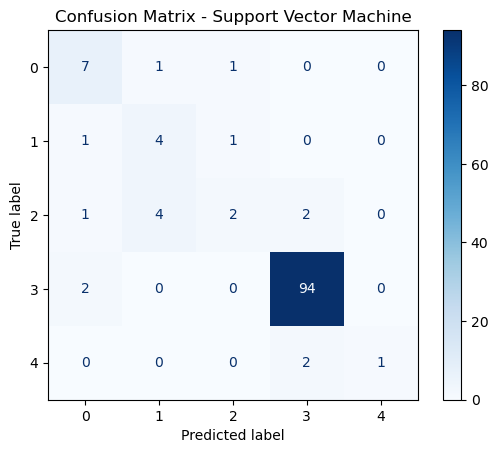

In [72]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, svc_ypred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

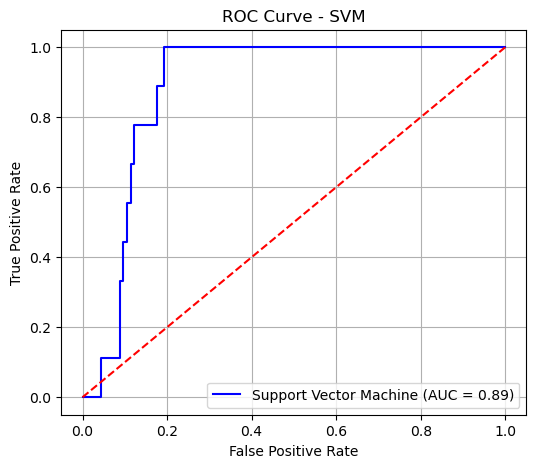

In [73]:
svc_yproba_test = best_svc.predict_proba(X_test)[:, 1]

#ROC Curve and auc

fpr, tpr, thresholds = roc_curve(y_test_binary, svc_yproba_test)
auc_score = roc_auc_score(y_test_binary, svc_yproba_test)

# Plot ROC Curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Support Vector Machine (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### K Nearest Neighbors (KNN) - MODEL 6

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [76]:
gridsearch_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
gridsearch_knn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [77]:
best_knn = gridsearch_knn.best_estimator_

print("KNN Best Params:", gridsearch_knn.best_params_)
print("KNN Best Score:", gridsearch_knn.best_score_)

KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNN Best Score: 0.9471861471861474


In [78]:
knn_ypred_train = best_knn.predict(X_train)
knn_ypred_test = best_knn.predict(X_test)

In [79]:
print('Classification Report of Training Data')
print(f'{classification_report(y_train, knn_ypred_train)}')
print("Accuracy: ", accuracy_score(y_train, knn_ypred_train))
print("precision: ", precision_score(y_train, knn_ypred_train, average='weighted'))
print("Recall: ", recall_score(y_train, knn_ypred_train, average='weighted'))
print("F1-Score: ", f1_score(y_train, knn_ypred_train, average='weighted'))

print('\nClassification Report of Test Data')
print(f'{classification_report(y_test, knn_ypred_test)}')
print("Accuracy: ", accuracy_score(y_test, knn_ypred_test))
print("precision: ", precision_score(y_test, knn_ypred_test, average='weighted'))
print("Recall: ", recall_score(y_test, knn_ypred_test, average='weighted'))
print("F1-Score: ", f1_score(y_test, knn_ypred_test, average='weighted'))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.79      0.73      0.76        15
           2       0.78      0.47      0.58        15
           3       0.97      1.00      0.99       437
           4       0.00      0.00      0.00         4

    accuracy                           0.96       492
   macro avg       0.70      0.61      0.65       492
weighted avg       0.95      0.96      0.95       492

Accuracy:  0.9613821138211383
precision:  0.9506558401423614
Recall:  0.9613821138211383
F1-Score:  0.9545214944772782

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.29      0.33      0.31         6
           2       0.00      0.00      0.00         9
           3       0.89      1.00      0.94        96
           4       0.00      0.00      0.00   

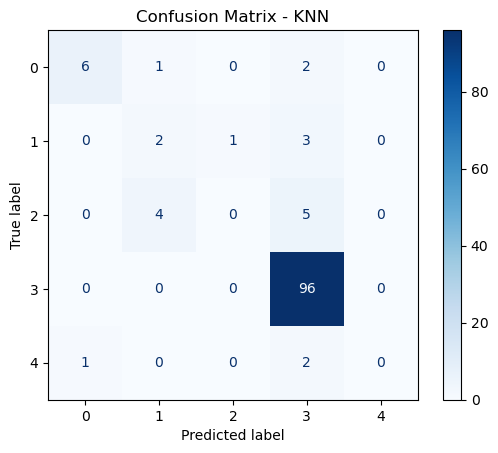

In [80]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, knn_ypred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()

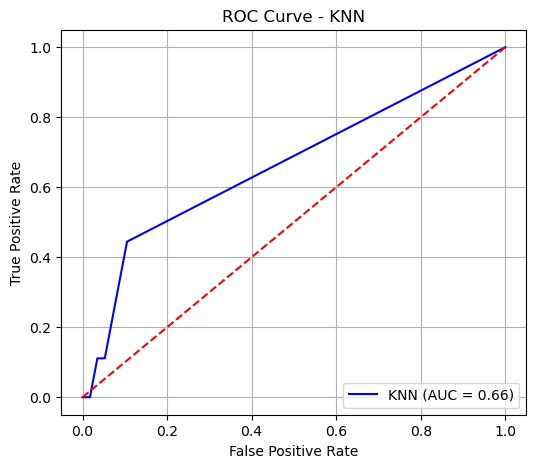

In [81]:
knn_yproba_test = best_knn.predict_proba(X_test)[:, 1]

#ROC Curve and auc

fpr, tpr, thresholds = roc_curve(y_test_binary, knn_yproba_test)
auc_score = roc_auc_score(y_test_binary, knn_yproba_test)

# Plot ROC Curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Gaussian Naive Bayes (GridSearch) - Model 7

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
gnb = GaussianNB()
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [84]:
gridsearch_gnb = GridSearchCV(gnb, param_grid_gnb, cv=5, scoring='accuracy', n_jobs=-1)
gridsearch_gnb.fit(X_train, y_train)

,estimator,GaussianNB()
,param_grid,"{'var_smoothing': [1e-09, 1e-08, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [85]:
best_gnb = gridsearch_gnb.best_estimator_

print("Naive Bayes Best Params:", gridsearch_gnb.best_params_)
print("Naive Bayes Best Score:", gridsearch_gnb.best_score_)

Naive Bayes Best Params: {'var_smoothing': 1e-09}
Naive Bayes Best Score: 0.9127190270047413


In [86]:
gnb_ypred_train = best_gnb.predict(X_train)
gnb_ypred_test = best_gnb.predict(X_test)

In [87]:
print('Classification Report of Training Data')
print(f'{classification_report(y_train, gnb_ypred_train)}')
print("Accuracy: ", accuracy_score(y_train, gnb_ypred_train))
print("precision: ", precision_score(y_train, gnb_ypred_train, average='weighted'))
print("Recall: ", recall_score(y_train, gnb_ypred_train, average='weighted'))
print("F1-Score: ", f1_score(y_train, gnb_ypred_train, average='weighted'))

print('\nClassification Report of Test Data')
print(f'{classification_report(y_test, gnb_ypred_test)}')
print("Accuracy: ", accuracy_score(y_test, gnb_ypred_test))
print("precision: ", precision_score(y_test, gnb_ypred_test, average='weighted'))
print("Recall: ", recall_score(y_test, gnb_ypred_test, average='weighted'))
print("F1-Score: ", f1_score(y_test, gnb_ypred_test, average='weighted'))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.58      0.93      0.72        15
           2       0.30      0.40      0.34        15
           3       0.99      0.95      0.97       437
           4       0.40      1.00      0.57         4

    accuracy                           0.92       492
   macro avg       0.64      0.82      0.69       492
weighted avg       0.95      0.92      0.93       492

Accuracy:  0.9247967479674797
precision:  0.9460172280294232
Recall:  0.9247967479674797
F1-Score:  0.9323533805561296

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.43      0.50      0.46         6
           2       0.50      0.33      0.40         9
           3       0.94      0.98      0.96        96
           4       0.67      0.67      0.67   

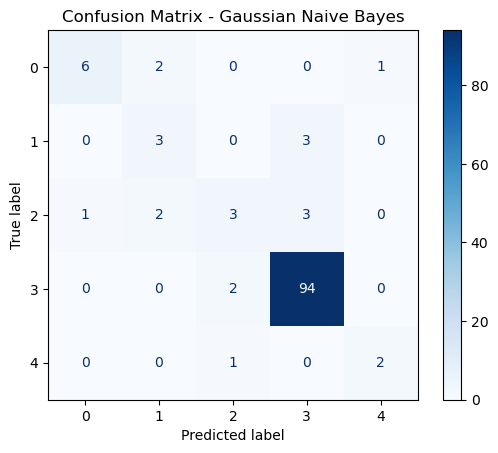

In [88]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, gnb_ypred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

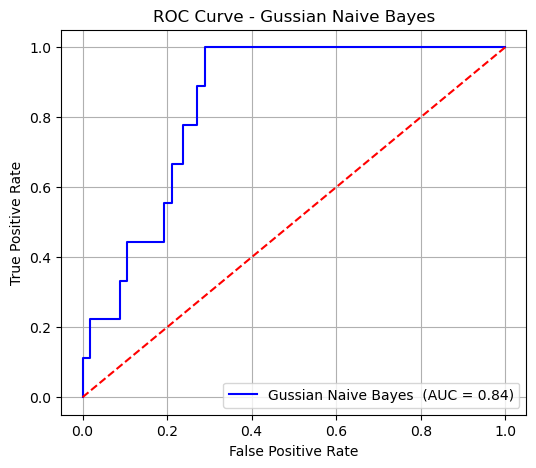

In [89]:
gnb_yproba_test = best_gnb.predict_proba(X_test)[:, 1]

#ROC Curve and auc

fpr, tpr, thresholds = roc_curve(y_test_binary, gnb_yproba_test)
auc_score = roc_auc_score(y_test_binary, gnb_yproba_test)

# Plot ROC Curve 
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Gussian Naive Bayes  (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### SUMMARY CHART

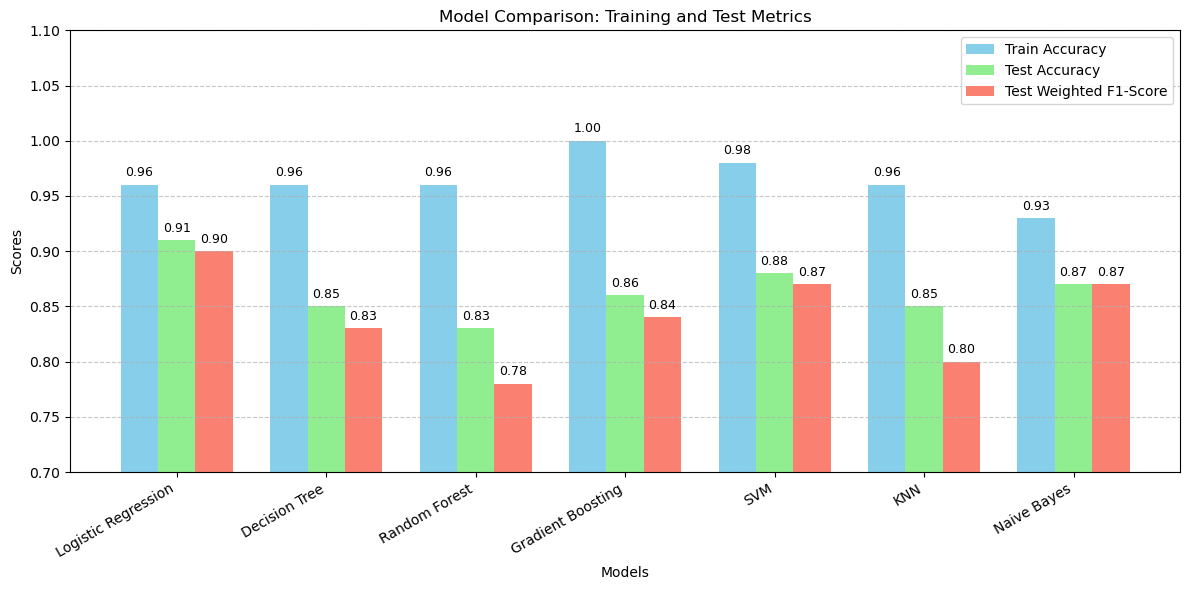

In [90]:
# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Naive Bayes']

# Evaluation metrics
train_accuracy = [0.96, 0.96, 0.96, 1.00, 0.98, 0.96, 0.93]
test_accuracy = [0.91, 0.85, 0.83, 0.86, 0.88, 0.85, 0.87]
test_weighted_f1 = [0.90, 0.83, 0.78, 0.84, 0.87, 0.80, 0.87]

# Bar width and positions
bar_width = 0.25
indices = np.arange(len(models))

plt.figure(figsize=(12, 6))

# Plot bars
bars1 = plt.bar(indices, train_accuracy, width=bar_width, label='Train Accuracy', color='skyblue')
bars2 = plt.bar(indices + bar_width, test_accuracy, width=bar_width, label='Test Accuracy', color='lightgreen')
bars3 = plt.bar(indices + 2*bar_width, test_weighted_f1, width=bar_width, label='Test Weighted F1-Score', color='salmon')

#Adding value labels on top of bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=9)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=9)

for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=9)

# Labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Training and Test Metrics')
plt.xticks(indices + bar_width, models, rotation=30, ha='right')
plt.ylim([0.7, 1.10])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

##### By comparing all the models "LOGISTIC REGRESSION" is the best model. 

| Model                   | Train Accuracy | Test Accuracy | Weighted F1 | Remarks                           |
| ----------------------- | -------------- | ------------- | ----------- | --------------------------------- |
| Logistic Regression     | 0.97           | 0.91          | 0.90        | Best balance, generalizes well    |
| SVM                     | 0.98           | 0.88          | 0.87        | Strong but slightly less accurate |
| Random Forest           | 0.96           | 0.83          | 0.78        | Overfitting (train >> test)       |
| Gradient Boosting       | 1.00           | 0.86          | 0.84        | Overfitted                        |
| Decision Tree           | 0.96           | 0.85          | 0.83        | Overfitting and variance          |
| KNN                     | 0.96           | 0.85          | 0.80        | Sensitive to data scaling         |
| Naive Bayes             | 0.93           | 0.87          | 0.87        | Performs decently but less stable |


Saving the best model 

In [91]:
import pickle
best_model = lr  # selecting the model after reviewing metrics

pickle.dump(best_model, open('best_liver_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))
print("Best model and preprocessing objects saved successfully for Streamlit deployment.")

Best model and preprocessing objects saved successfully for Streamlit deployment.


In [92]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [93]:
# LOAD MODEL + SCALER + LABEL ENCODER
# ------------------------------------------------------
import pickle
model = pickle.load(open('best_liver_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
le = pickle.load(open('label_encoder.pkl', 'rb'))

# ------------------------------------------------------


In [94]:
# SIDEBAR
# ------------------------------------------------------



NameError: name 'st' is not defined